# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [85]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [86]:
from IPython.display import Image
Image(filename='data/pokemon_typechart.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'data/pokemon_typechart.png'

In [104]:
df = pd.read_csv("data/Pokemon.csv")
df1 = pd.read_csv("data/kaggle_pokemon_dataset.csv")

In [105]:
df1['Name'] = df1['name']
df1.drop(df1.columns.difference(['Name', 'against_water', 'against_rock']), inplace=True, axis=1)
df1.columns

Index(['against_rock', 'against_water', 'Name'], dtype='object')

In [106]:
df1.sample(5)

,against_rock,against_water,Name
35,1.0,1.0,Clefable
487,1.0,1.0,Cresselia
296,0.5,1.0,Hariyama
674,0.5,1.0,Pangoro
381,1.0,0.5,Kyogre


In [107]:
filtered_cols = [col for col in df1 if col.startswith('against_water') or col.startswith('against_rock')]
# filtered_cols.append()
filtered_cols.append('Name')
# filtered_cols
# df1.loc[filtered_cols]
df1[filtered_cols]
# print(f'There are <{legendary_ctr}> legendary pokemons in this dataset!')

,against_rock,against_water,Name
0,1.0,0.5,Bulbasaur
1,1.0,0.5,Ivysaur
2,1.0,0.5,Venusaur
3,2.0,2.0,Charmander
4,2.0,2.0,Charmeleon
...,...,...,...
796,1.0,1.0,Celesteela
797,0.5,0.5,Kartana
798,1.0,0.5,Guzzlord
799,1.0,1.0,Necrozma


In [108]:
# # mask = df1['name'] == df['Name']
# # mask
# # name_chk = df['Name'].loc[mask]
# # pd.merge(left=df, right=df1, how='left', left_on='Name', right_on='name').apply(lambda x: str(x.against_water) in str(x.against_water), axis=1).sample(10)
# df.sort_index(inplace=True)
# df1.sort_index(inplace=True)

# if df1['Name'] == df['Name']:
#     df['against_water'] = df1['against_water']

df = df.merge(df1, on='Name', how='left')
mask = df['Type_1'] == 'Fire'
df[['Name', 'Type_1', 'against_water', 'against_rock']].loc[mask].sample(10)

,Name,Type_1,against_water,against_rock
156,Typhlosion,Fire,2.0,2.0
498,Pignite,Fire,2.0,1.0
5,Charizard,Fire,2.0,4.0
217,Slugma,Fire,2.0,2.0
391,Infernape,Fire,2.0,1.0
154,Cyndaquil,Fire,2.0,2.0
58,Arcanine,Fire,2.0,2.0
323,Torkoal,Fire,2.0,2.0
667,Pyroar,Fire,2.0,2.0
661,Fletchinder,Fire,2.0,4.0


In [109]:
df[['Name', 'Type_1', 'against_water', 'against_rock']]

,Name,Type_1,against_water,against_rock
0,Bulbasaur,Grass,0.5,1.0
1,Ivysaur,Grass,0.5,1.0
2,Venusaur,Grass,0.5,1.0
3,Charmander,Fire,2.0,2.0
4,Charmeleon,Fire,2.0,2.0
...,...,...,...,...
716,Yveltal,Dark,1.0,2.0
717,Zygarde,Dragon,1.0,0.5
718,Diancie,Rock,2.0,1.0
719,Hoopa,Psychic,1.0,1.0


## 1. How many Legendary Pokemon are there? ( 1pt )
---

In [110]:
mask = df['isLegendary']
legendary_ctr = df['Name'].loc[mask].count()

print(f'There are <{legendary_ctr}> legendary pokemons in this dataset!')

There are <46> legendary pokemons in this dataset!


In [111]:
print(df.groupby(['isLegendary'])['isLegendary'].count())

isLegendary
False    675
True      46
Name: isLegendary, dtype: int64


## 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )
---

In [112]:
df['hpToAtkRatio'] = df['Attack'] / df['HP']
df[['Name', 'HP', 'Attack', 'hpToAtkRatio']].sort_values(by=['hpToAtkRatio'], ascending=False).head(1)

,Name,HP,Attack,hpToAtkRatio
291,Shedinja,1,90,90.0


## 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )
---

In [113]:
# convert Type_1 and Type_2 entries to 'True' if == to 'Fire'. Else, convert to "False" 

df['isFireType'] = (df['Type_1'].eq('Fire')) | (df['Type_2'].eq('Fire'))
df[['Name', 'Type_1', 'Type_2', 'isFireType']].sample(20)

,Name,Type_1,Type_2,isFireType
282,Surskit,Bug,Water,False
275,Taillow,Normal,Flying,False
705,Goodra,Dragon,NaN,False
152,Bayleef,Grass,NaN,False
650,Quilladin,Grass,NaN,False
522,Zebstrika,Electric,NaN,False
719,Hoopa,Psychic,Ghost,False
510,Pansage,Grass,NaN,False
137,Omanyte,Rock,Water,False
665,Vivillon,Bug,Flying,False


## 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )
---

In [114]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 20))
# fig.suptitle('\nStats of Legendary Pokemon', fontsize=30)
# plt.style.use('fivethirtyeight')
# # plt.figure(figsize=(20, 10))
# # fig.suptitle('Legendary vs. Non-legendary Pokemon Stats')

# mask1 = df['isLegendary']
# leg_1 = df.loc[mask1]
# leg_2 = df.loc[mask1]
# leg_3 = df.loc[mask1]
# leg_4 = df.loc[mask1]

# # attrs = list(df.select_dtypes(['int64', 'float64']).columns)
# attrs_1 = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
# attrs_2 = ['Number', 'Total', 'Weight_kg']
# attrs_3 = ['Generation', 'Height_m', 'Catch_Rate']
# attrs_4 = ['Pr_Male', 'hpToAtkRatio']

# leg_1 = leg_1[attrs_1]
# leg_2 = leg_2[attrs_2]
# leg_3 = leg_3[attrs_3]
# leg_4 = leg_4[attrs_4]

# sns.boxplot(ax=axes[0, 0], data=leg_1)
# sns.boxplot(ax=axes[0, 1], data=leg_2)
# sns.boxplot(ax=axes[1, 0], data=leg_3)
# sns.boxplot(ax=axes[1, 1], data=leg_4)
# # ax1.title.set_text('\nStats of Legendary Pokemon\n')
# # ax2.title.set_text('\nStats of Non-legendary Pokemon\n')

In [115]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 20))
# fig.suptitle('\nStats of Non-legendary Pokemon', fontsize=30)

# mask_2 = df['isLegendary'] == False
# nonleg_1 = df.loc[mask_2]
# nonleg_2 = df.loc[mask_2]
# nonleg_3 = df.loc[mask_2]
# nonleg_4 = df.loc[mask_2]

# attrs_3 = ['Generation', 'Pr_Male']
# attrs_4 = ['Catch_Rate', 'Height_m', 'hpToAtkRatio']

# nonleg_1 = nonleg_1[attrs_1]
# nonleg_2 = nonleg_2[attrs_2]
# nonleg_3 = nonleg_3[attrs_3]
# nonleg_4 = nonleg_4[attrs_4]

# sns.boxplot(ax=axes[0, 0], data=nonleg_1)
# sns.boxplot(ax=axes[0, 1], data=nonleg_2)
# sns.boxplot(ax=axes[1, 0], data=nonleg_3)
# sns.boxplot(ax=axes[1, 1], data=nonleg_4)

<AxesSubplot:xlabel='isLegendary', ylabel='Generation'>

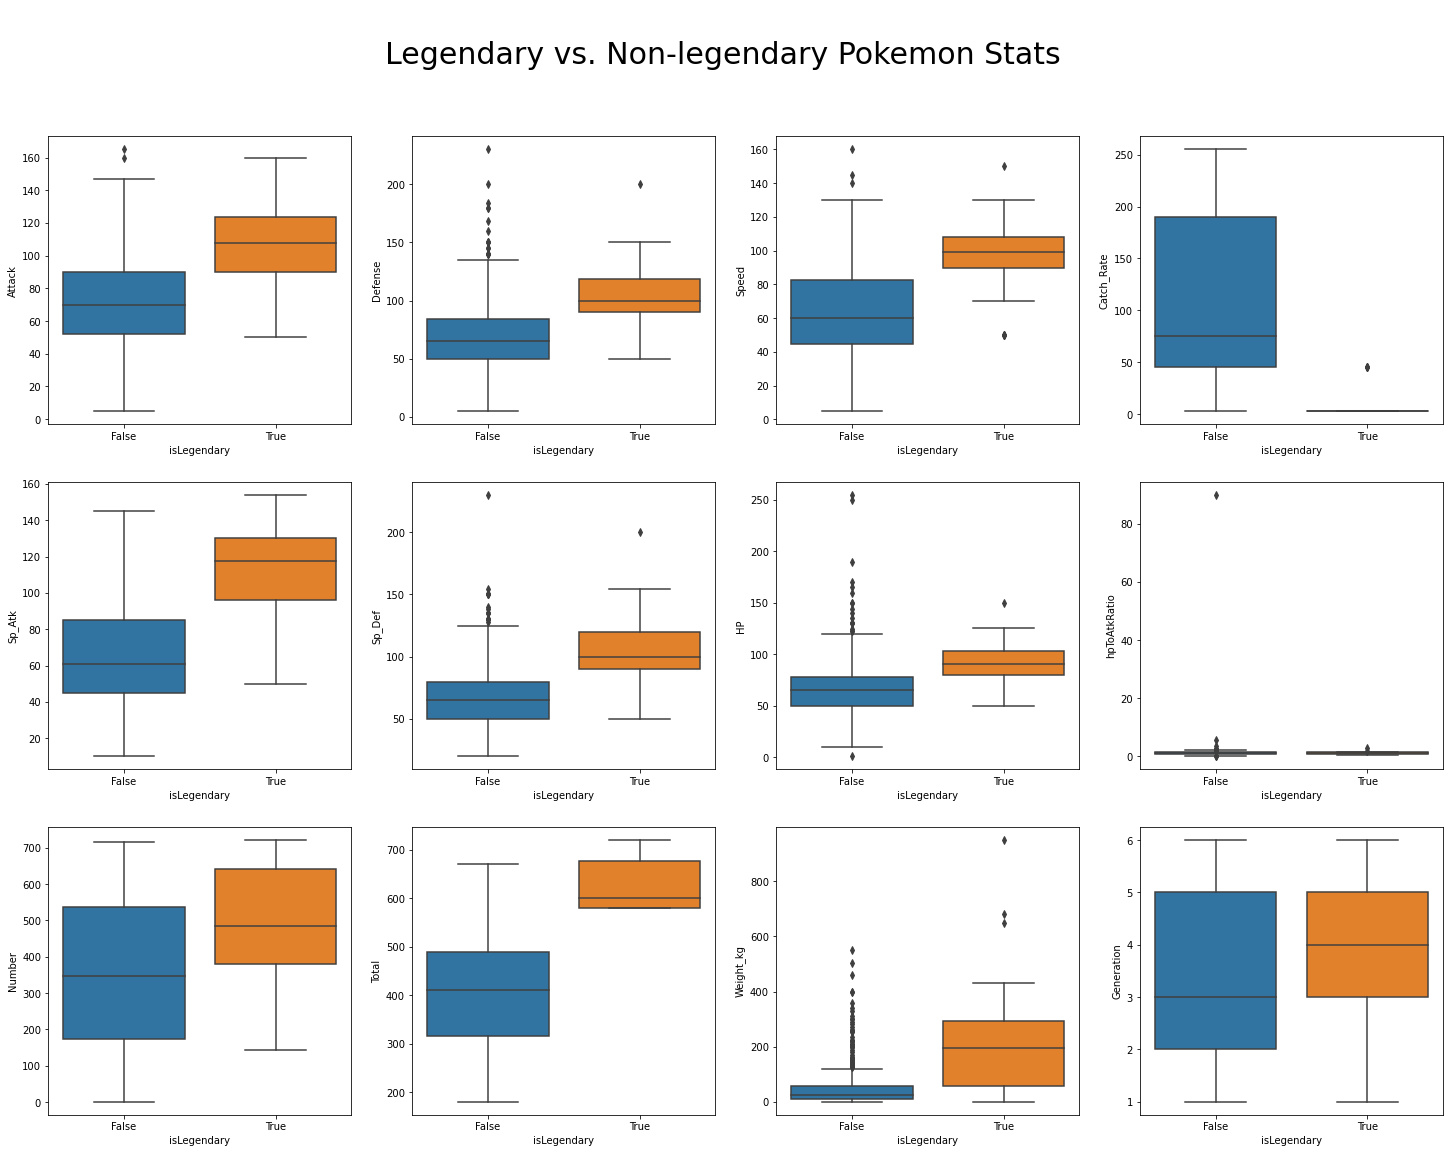

In [116]:
fig, axes = plt.subplots(3, 4, figsize=(25, 18))

fig.suptitle('\nLegendary vs. Non-legendary Pokemon Stats', fontsize=30)

sns.boxplot(ax=axes[0, 0], data=df, x='isLegendary', y='Attack')
sns.boxplot(ax=axes[0, 1], data=df, x='isLegendary', y='Defense')
sns.boxplot(ax=axes[0, 2], data=df, x='isLegendary', y='Speed')
sns.boxplot(ax=axes[0, 3], data=df, x='isLegendary', y='Catch_Rate')
sns.boxplot(ax=axes[1, 0], data=df, x='isLegendary', y='Sp_Atk')
sns.boxplot(ax=axes[1, 1], data=df, x='isLegendary', y='Sp_Def')
sns.boxplot(ax=axes[1, 2], data=df, x='isLegendary', y='HP')
sns.boxplot(ax=axes[1, 3], data=df, x='isLegendary', y='hpToAtkRatio')
sns.boxplot(ax=axes[2, 0], data=df, x='isLegendary', y='Number')
sns.boxplot(ax=axes[2, 1], data=df, x='isLegendary', y='Total')
sns.boxplot(ax=axes[2, 2], data=df, x='isLegendary', y='Weight_kg')
sns.boxplot(ax=axes[2, 3], data=df, x='isLegendary', y='Generation')

## 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )
---
## 6. What is the accuracy of your model? ( 2pts )

In [117]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'against_rock', 'against_water', 'hpToAtkRatio', 'isFireType'],
      dtype='object')

In [118]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,against_rock,against_water,hpToAtkRatio
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000,719.000000,719.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879,1.255216,1.067107,1.275442
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513,0.706780,0.615576,3.336894
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000,0.250000,0.250000,0.020000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000,1.000000,0.500000,0.875000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000,1.000000,1.000000,1.111111
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000,2.000000,1.000000,1.368421
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000,4.000000,4.000000,90.000000


<AxesSubplot:xlabel='isFireType', ylabel='Generation'>

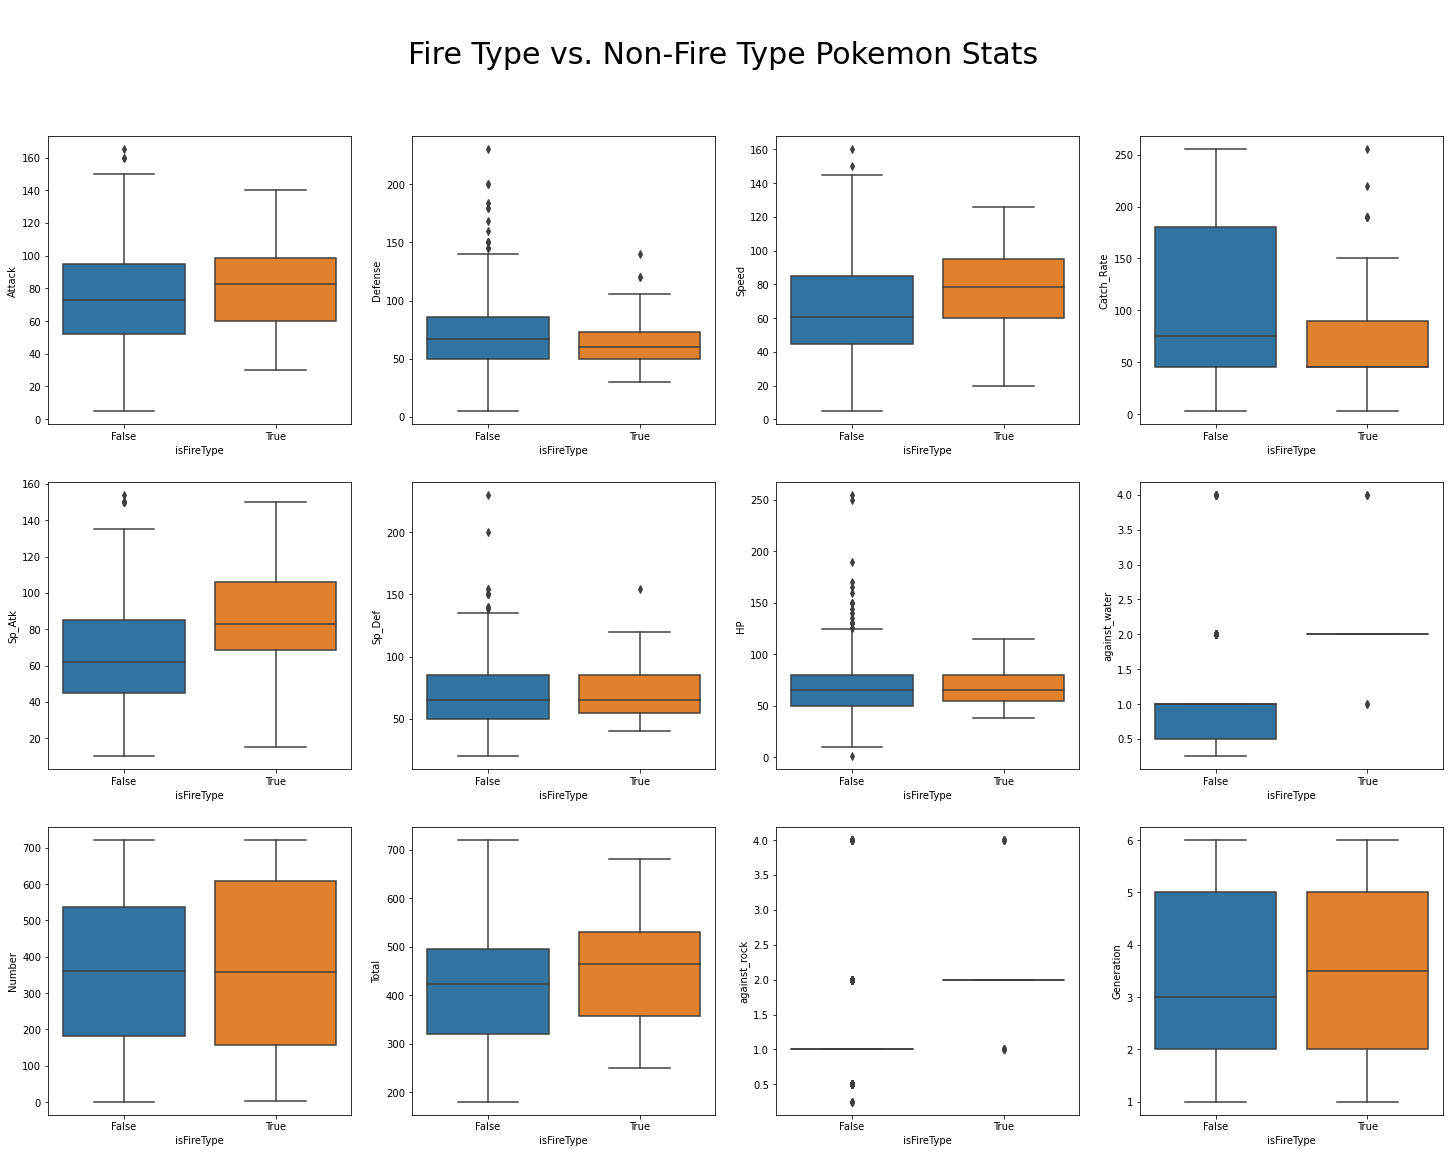

In [119]:
fig, axes = plt.subplots(3, 4, figsize=(25, 18))

fig.suptitle('\nFire Type vs. Non-Fire Type Pokemon Stats', fontsize=30)

sns.boxplot(ax=axes[0, 0], data=df, x='isFireType', y='Attack')
sns.boxplot(ax=axes[0, 1], data=df, x='isFireType', y='Defense')
sns.boxplot(ax=axes[0, 2], data=df, x='isFireType', y='Speed')
sns.boxplot(ax=axes[0, 3], data=df, x='isFireType', y='Catch_Rate')
sns.boxplot(ax=axes[1, 0], data=df, x='isFireType', y='Sp_Atk')
sns.boxplot(ax=axes[1, 1], data=df, x='isFireType', y='Sp_Def')
sns.boxplot(ax=axes[1, 2], data=df, x='isFireType', y='HP')
sns.boxplot(ax=axes[1, 3], data=df, x='isFireType', y='against_water')
sns.boxplot(ax=axes[2, 0], data=df, x='isFireType', y='Number')
sns.boxplot(ax=axes[2, 1], data=df, x='isFireType', y='Total')
sns.boxplot(ax=axes[2, 2], data=df, x='isFireType', y='against_rock')
sns.boxplot(ax=axes[2, 3], data=df, x='isFireType', y='Generation')

Text(0.5, 1.0, '\nHeatmap of Main Dataframe Correlation Values\n')

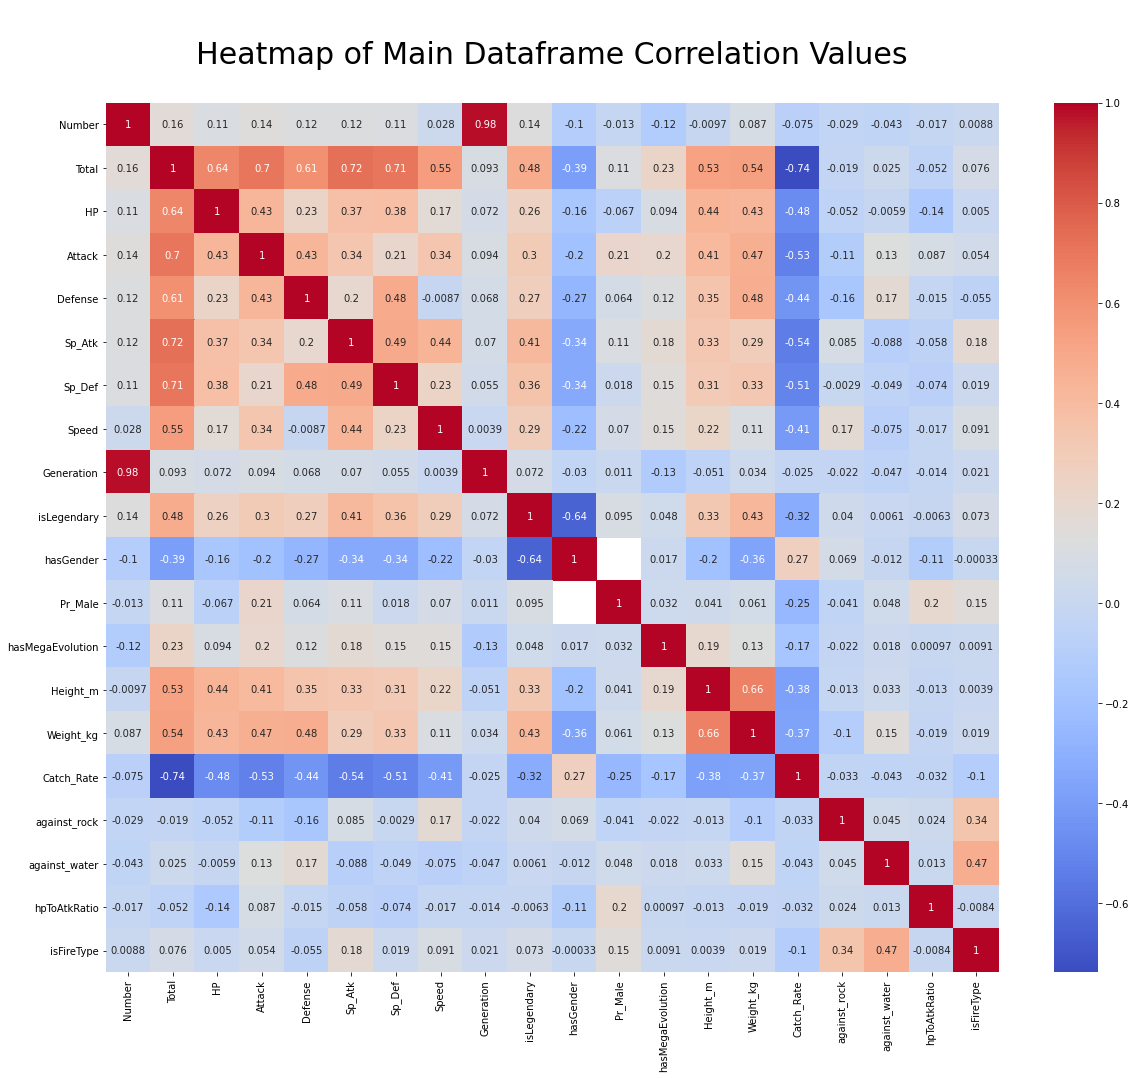

In [120]:
ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
ax.set_title('\nHeatmap of Main Dataframe Correlation Values\n', fontsize=30)

In [121]:
# check which cols have NULL entries

null_cols = df.columns[df.isna().any()].tolist()
print(f'\nColumns with NULL entries: {null_cols}\n')


Columns with NULL entries: ['Type_2', 'Pr_Male', 'Egg_Group_2', 'against_rock', 'against_water']



In [122]:
mask = df['against_rock'].isnull() & df['against_water'].isnull()
df.loc[mask]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,against_rock,against_water,hpToAtkRatio,isFireType
121,122,Mr._Mime,Psychic,Fairy,460,40,45,65,100,120,...,NaN,False,1.30,54.5,45,bipedal_tailless,NaN,NaN,1.125,False
438,439,Mime_Jr.,Psychic,Fairy,310,20,25,45,70,90,...,NaN,False,0.61,13.0,145,bipedal_tailless,NaN,NaN,1.250,False


In [123]:
# replace NaN values of against_water and against_rock features with their column averages
df['against_water'].fillna((df['against_water'].mean()), inplace=True)
df['against_rock'].fillna((df['against_rock'].mean()), inplace=True)

# recheck
null_cols = df.columns[df.isna().any()].tolist()
print(f'\nColumns with NULL entries: {null_cols}\n')


Columns with NULL entries: ['Type_2', 'Pr_Male', 'Egg_Group_2']



In [124]:
df.sample(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,against_rock,against_water,hpToAtkRatio,isFireType
269,270,Lotad,Water,Grass,220,40,30,30,40,50,...,Grass,False,0.51,2.6,255,insectoid,1.0,0.25,0.750000,False
201,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,...,NaN,False,1.30,28.5,45,head_base,1.0,1.00,0.173684,False
32,33,Nidorino,Poison,NaN,365,61,72,57,55,55,...,Field,False,0.89,19.5,120,quadruped,1.0,1.00,1.180328,False
19,20,Raticate,Normal,NaN,413,55,81,60,50,70,...,NaN,False,0.71,18.5,127,quadruped,1.0,1.00,1.472727,False
184,185,Sudowoodo,Rock,NaN,410,70,100,115,30,65,...,NaN,False,1.19,38.0,65,bipedal_tailless,1.0,2.00,1.428571,False
457,458,Mantyke,Water,Flying,345,45,20,50,60,120,...,NaN,False,0.99,65.0,25,two_wings,2.0,0.50,0.444444,False
237,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,...,NaN,False,0.41,6.0,45,bipedal_tailless,2.0,1.00,0.666667,False
74,75,Graveler,Rock,Ground,390,55,95,115,45,45,...,NaN,False,0.99,105.0,120,bipedal_tailless,0.5,4.00,1.727273,False
614,615,Cryogonal,Ice,NaN,485,70,50,30,95,135,...,NaN,False,1.09,148.0,25,head_only,2.0,1.00,0.714286,False
572,573,Cinccino,Normal,NaN,470,75,95,60,65,60,...,NaN,False,0.51,7.5,60,quadruped,1.0,1.00,1.266667,False


In [125]:
# specify features that will not be used as beta coefficients for the logistic regression model

drop_cols = ['Name', 'Defense', 'hpToAtkRatio', 'Weight_kg', 'Generation', 'Type_1', 'Type_2', 'Pr_Male', 'Egg_Group_2']
X = df.drop(drop_cols, axis=1)
# X = df[['Catch_Rate', 'Attack', 'Sp_Atk', 'Color', 'isFireType']]

In [126]:
X.sample(10)

,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Catch_Rate,Body_Style,against_rock,against_water,isFireType
140,141,495,60,115,65,70,80,False,Brown,True,Water_1,False,1.30,45,bipedal_tailed,1.0,1.00,False
275,276,270,40,55,30,30,85,False,Blue,True,Flying,False,0.30,200,two_wings,2.0,1.00,False
229,230,540,75,95,95,95,85,False,Blue,True,Water_1,False,1.80,45,head_base,1.0,0.25,False
377,378,580,80,50,100,200,50,True,Blue,False,Undiscovered,False,1.80,3,bipedal_tailless,2.0,1.00,False
307,308,410,60,60,60,75,80,False,Red,True,Human-Like,True,1.30,90,bipedal_tailless,0.5,1.00,False
672,673,531,123,100,97,81,68,False,Brown,True,Field,False,1.70,45,quadruped,1.0,0.50,False
713,714,245,40,30,45,40,55,False,Purple,True,Flying,False,0.51,190,two_wings,2.0,0.50,False
681,682,341,78,52,63,65,23,False,Pink,True,Fairy,False,0.20,200,head_arms,1.0,1.00,False
329,330,520,80,100,80,80,100,False,Green,True,Bug,False,2.01,45,two_wings,0.5,1.00,False
151,152,318,45,49,49,65,45,False,Green,True,Monster,False,0.89,45,quadruped,1.0,0.50,False


In [127]:
eg1_types = df['Egg_Group_1'].unique()
bd_types = df['Body_Style'].unique()
color_types = df['Color'].unique()

print(f'\nEgg_Group_1 types: \n{eg1_types}')
print(f'\nBody_Style types: \n{bd_types}')
print(f'\nColor types: \n{color_types}\n')


Egg_Group_1 types: 
['Monster' 'Bug' 'Flying' 'Field' 'Undiscovered' 'Fairy' 'Grass' 'Water_1'
 'Human-Like' 'Water_3' 'Mineral' 'Amorphous' 'Water_2' 'Ditto' 'Dragon']

Body_Style types: 
['quadruped' 'bipedal_tailed' 'insectoid' 'serpentine_body' 'four_wings'
 'two_wings' 'bipedal_tailless' 'head_legs' 'head_base' 'multiple_bodies'
 'several_limbs' 'head_arms' 'with_fins' 'head_only']

Color types: 
['Green' 'Red' 'Blue' 'White' 'Brown' 'Yellow' 'Purple' 'Pink' 'Grey'
 'Black']



In [128]:
X.describe()

,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,Height_m,Catch_Rate,against_rock,against_water
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,68.737864,69.291262,65.714286,1.144979,100.246879,1.255216,1.067107
std,208.27906,109.663671,25.848272,28.984475,28.788005,27.015860,27.277920,1.044369,76.573513,0.705797,0.614721
min,1.00000,180.000000,1.000000,5.000000,10.000000,20.000000,5.000000,0.100000,3.000000,0.250000,0.250000
25%,181.00000,320.000000,50.000000,53.000000,45.000000,50.000000,45.000000,0.610000,45.000000,1.000000,0.500000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,0.990000,65.000000,1.000000,1.000000
75%,541.00000,499.000000,80.000000,95.000000,90.000000,85.000000,85.000000,1.400000,180.000000,2.000000,1.000000
max,721.00000,720.000000,255.000000,165.000000,154.000000,230.000000,160.000000,14.500000,255.000000,4.000000,4.000000


In [129]:
X.head(10)

,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Catch_Rate,Body_Style,against_rock,against_water,isFireType
0,1,318,45,49,65,65,45,False,Green,True,Monster,False,0.71,45,quadruped,1.0,0.5,False
1,2,405,60,62,80,80,60,False,Green,True,Monster,False,0.99,45,quadruped,1.0,0.5,False
2,3,525,80,82,100,100,80,False,Green,True,Monster,True,2.01,45,quadruped,1.0,0.5,False
3,4,309,39,52,60,50,65,False,Red,True,Monster,False,0.61,45,bipedal_tailed,2.0,2.0,True
4,5,405,58,64,80,65,80,False,Red,True,Monster,False,1.09,45,bipedal_tailed,2.0,2.0,True
5,6,534,78,84,109,85,100,False,Red,True,Monster,True,1.70,45,bipedal_tailed,4.0,2.0,True
6,7,314,44,48,50,64,43,False,Blue,True,Monster,False,0.51,45,bipedal_tailed,1.0,0.5,False
7,8,405,59,63,65,80,58,False,Blue,True,Monster,False,0.99,45,bipedal_tailed,1.0,0.5,False
8,9,530,79,83,85,105,78,False,Blue,True,Monster,True,1.60,45,bipedal_tailed,1.0,0.5,False
9,10,195,45,30,20,20,45,False,Green,True,Bug,False,0.30,255,insectoid,2.0,1.0,False


In [130]:
# encode categorical features using Leave One Out Encoding
from category_encoders import TargetEncoder, LeaveOneOutEncoder

enc = LeaveOneOutEncoder(cols=['Egg_Group_1', 'Body_Style', 'Color'])
training_set = enc.fit_transform(X, df["isFireType"])

training_set.head(10)

C:\Users\matthewkent.regalado\Anaconda3\envs\project-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Catch_Rate,Body_Style,against_rock,against_water,isFireType
0,1,318,45,49,65,65,45,False,0.000000,True,0.041096,False,0.71,45,0.164179,1.0,0.5,False
1,2,405,60,62,80,80,60,False,0.000000,True,0.041096,False,0.99,45,0.164179,1.0,0.5,False
2,3,525,80,82,100,100,80,False,0.000000,True,0.041096,True,2.01,45,0.164179,1.0,0.5,False
3,4,309,39,52,60,50,65,False,0.351351,True,0.027397,False,0.61,45,0.108280,2.0,2.0,True
4,5,405,58,64,80,65,80,False,0.351351,True,0.027397,False,1.09,45,0.108280,2.0,2.0,True
5,6,534,78,84,109,85,100,False,0.351351,True,0.027397,True,1.70,45,0.108280,4.0,2.0,True
6,7,314,44,48,50,64,43,False,0.000000,True,0.041096,False,0.51,45,0.114650,1.0,0.5,False
7,8,405,59,63,65,80,58,False,0.000000,True,0.041096,False,0.99,45,0.114650,1.0,0.5,False
8,9,530,79,83,85,105,78,False,0.000000,True,0.041096,True,1.60,45,0.114650,1.0,0.5,False
9,10,195,45,30,20,20,45,False,0.000000,True,0.030769,False,0.30,255,0.034483,2.0,1.0,False


Text(0.5, 1.0, "\nHeatmap of 'training_set' Dataframe Correlation Values\n")

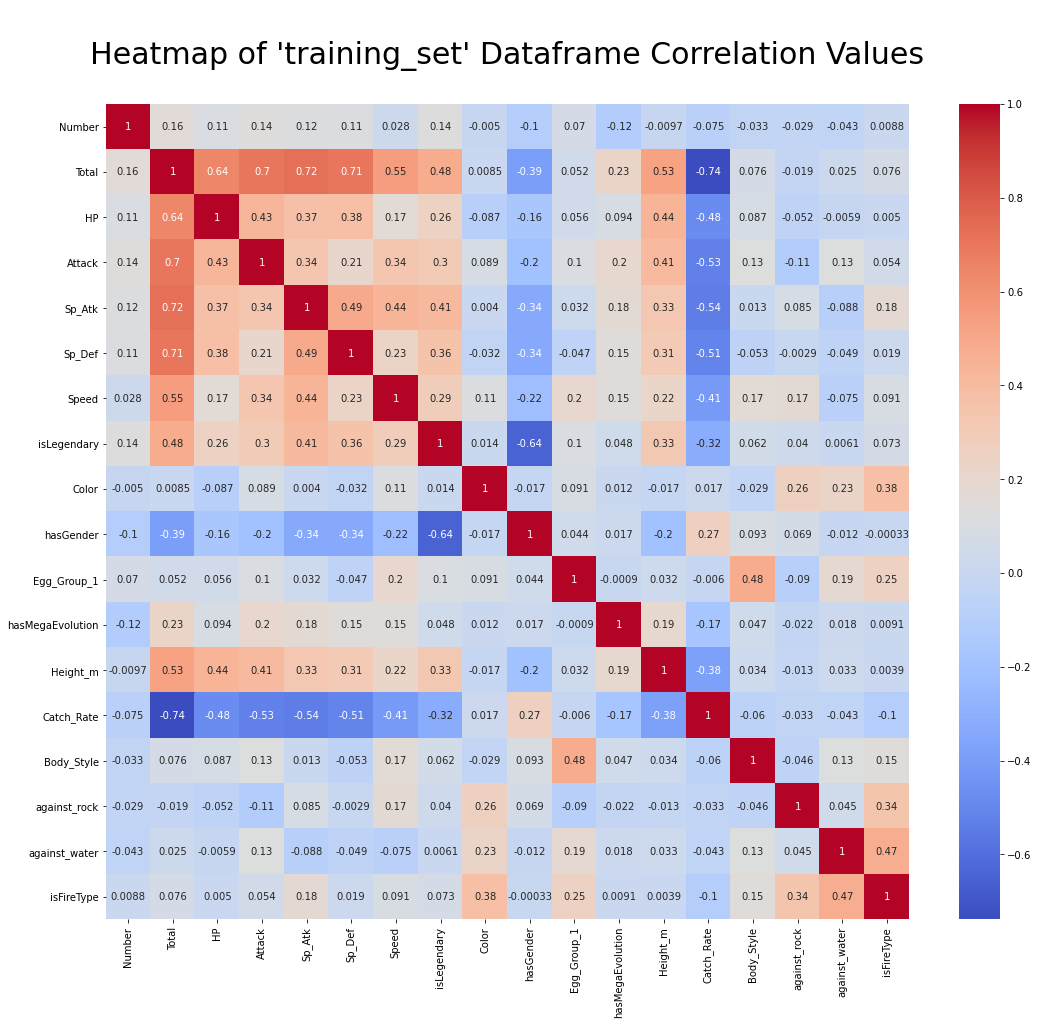

In [131]:
ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(training_set.corr(), cmap='coolwarm', annot=True)
ax.set_title('\nHeatmap of \'training_set\' Dataframe Correlation Values\n', fontsize=30)

In [132]:
training_set.columns

Index(['Number', 'Total', 'HP', 'Attack', 'Sp_Atk', 'Sp_Def', 'Speed',
       'isLegendary', 'Color', 'hasGender', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Catch_Rate', 'Body_Style', 'against_rock', 'against_water',
       'isFireType'],
      dtype='object')

In [133]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Total             721 non-null    int64  
 2   HP                721 non-null    int64  
 3   Attack            721 non-null    int64  
 4   Sp_Atk            721 non-null    int64  
 5   Sp_Def            721 non-null    int64  
 6   Speed             721 non-null    int64  
 7   isLegendary       721 non-null    bool   
 8   Color             721 non-null    float64
 9   hasGender         721 non-null    bool   
 10  Egg_Group_1       721 non-null    float64
 11  hasMegaEvolution  721 non-null    bool   
 12  Height_m          721 non-null    float64
 13  Catch_Rate        721 non-null    int64  
 14  Body_Style        721 non-null    float64
 15  against_rock      721 non-null    float64
 16  against_water     721 non-null    float64
 1

In [134]:
list(training_set.select_dtypes(['int64', 'float64']).columns)

['Number',
 'Total',
 'HP',
 'Attack',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Color',
 'Egg_Group_1',
 'Height_m',
 'Catch_Rate',
 'Body_Style',
 'against_rock',
 'against_water']

<AxesSubplot:xlabel='isFireType', ylabel='Color'>

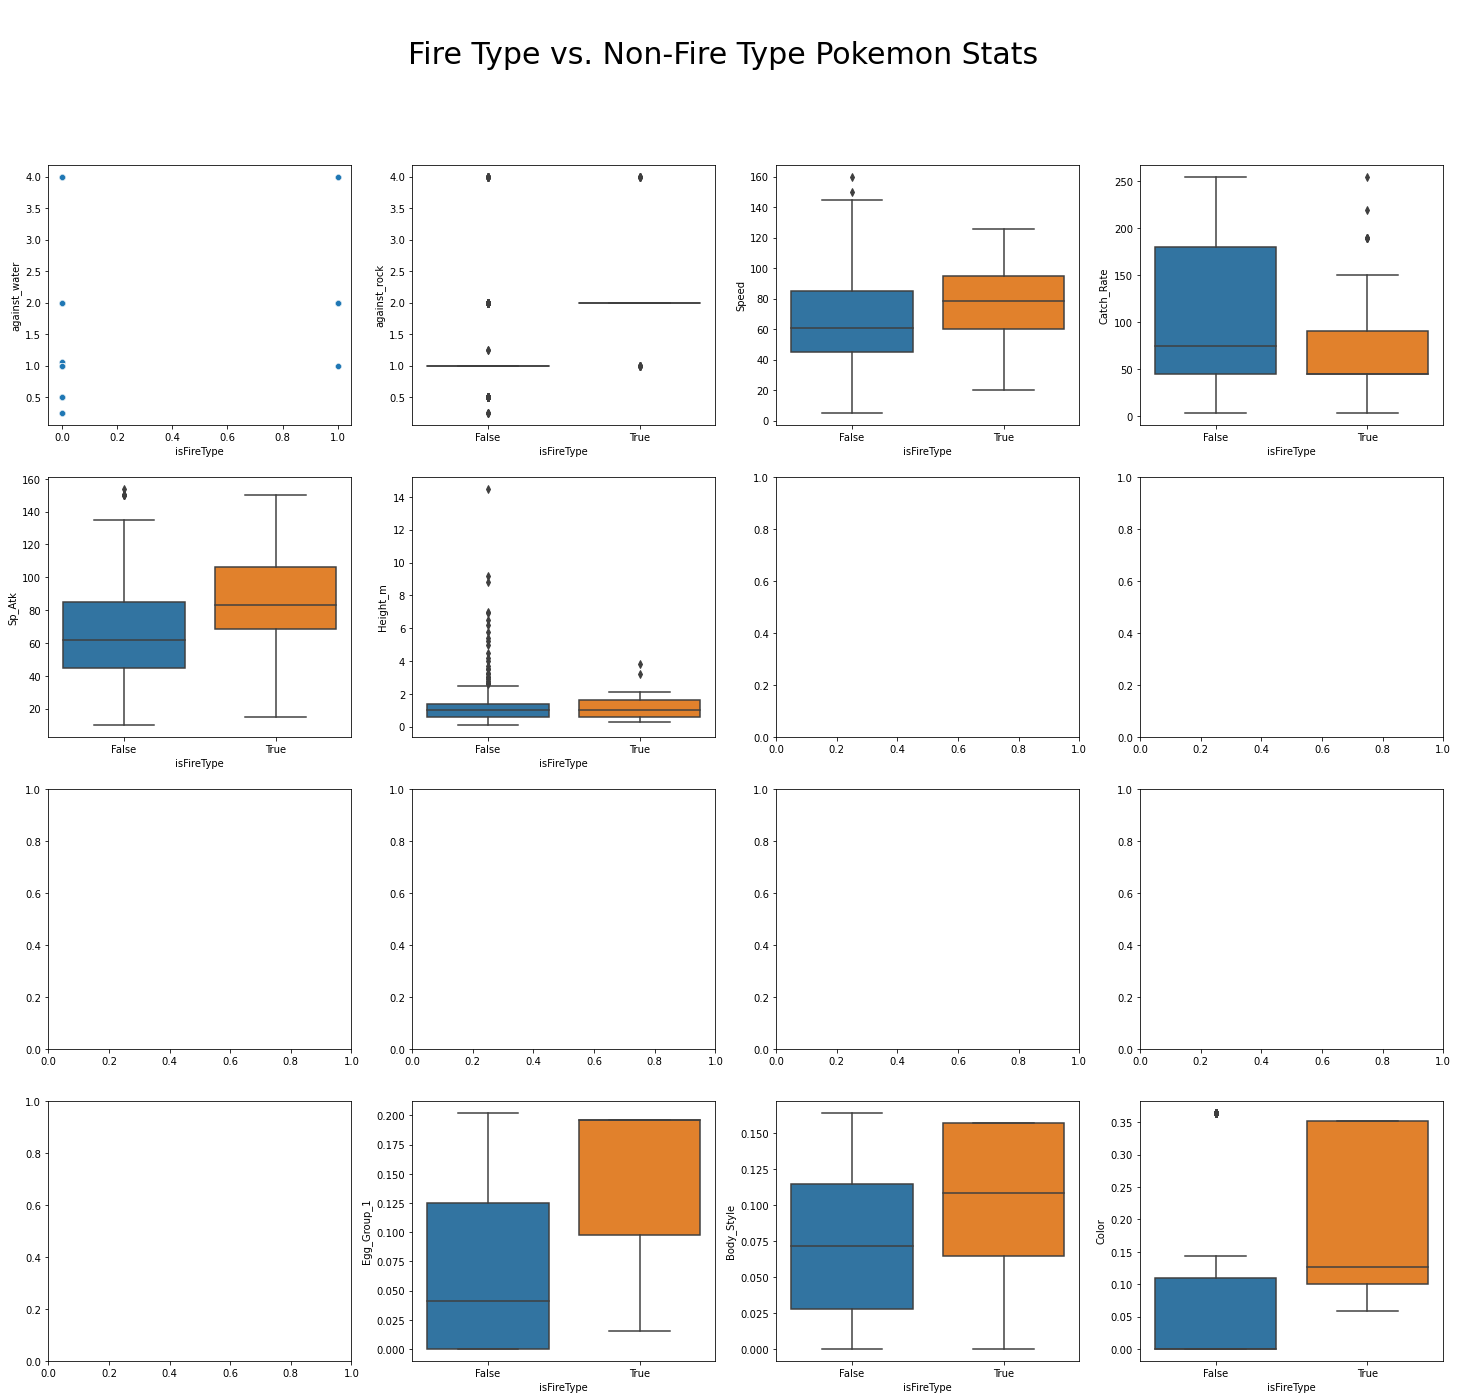

In [135]:
# fig, axes = plt.subplots(1, 4, figsize=(25, 12))

# fig.suptitle('\nFire Type vs. Non-Fire Type Pokemon Stats\n\n')

# sns.boxplot(ax=axes[0], data=training_set, x='isFireType', y='Catch_Rate')
# sns.boxplot(ax=axes[1], data=training_set, x='isFireType', y='Body_Style')
# sns.boxplot(ax=axes[2], data=training_set, x='isFireType', y='Sp_Atk')
# sns.boxplot(ax=axes[3], data=training_set, x='isFireType', y='Color')

fig, axes = plt.subplots(4, 4, figsize=(25, 22))

fig.suptitle('\nFire Type vs. Non-Fire Type Pokemon Stats', fontsize=30)

sns.scatterplot(ax=axes[0, 0], data=training_set, x='isFireType', y='against_water')
sns.boxplot(ax=axes[0, 1], data=training_set, x='isFireType', y='against_rock')
sns.boxplot(ax=axes[0, 2], data=training_set, x='isFireType', y='Speed')
sns.boxplot(ax=axes[0, 3], data=training_set, x='isFireType', y='Catch_Rate')
sns.boxplot(ax=axes[1, 0], data=training_set, x='isFireType', y='Sp_Atk')
sns.boxplot(ax=axes[1, 1], data=training_set, x='isFireType', y='Height_m')
# sns.boxplot(ax=axes[1, 1], data=training_set, x='isFireType', y='Sp_Def')1
# sns.boxplot(ax=axes[1, 2], data=training_set, x='isFireType', y='HP')1
# sns.boxplot(ax=axes[1, 3], data=training_set, x='isFireType', y='hpToAtkRatio')
# sns.boxplot(ax=axes[2, 0], data=training_set, x='isFireType', y='Number')1
# sns.boxplot(ax=axes[2, 1], data=training_set, x='isFireType', y='Total')1
# sns.boxplot(ax=axes[2, 2], data=training_set, x='isFireType', y='Weight_kg')
# sns.boxplot(ax=axes[2, 3], data=training_set, x='isFireType', y='Generation')

# 'Name', 'Defense', 'hpToAtkRatio', 'Weight_kg', 'Generation'
# 1 'Attack', 'Sp_Def', 'HP', 'Number', 'Total'

# sns.boxplot(ax=axes[3, 0], data=training_set, x='isFireType', y='Name')
sns.boxplot(ax=axes[3, 1], data=training_set, x='isFireType', y='Egg_Group_1')
sns.boxplot(ax=axes[3, 2], data=training_set, x='isFireType', y='Body_Style')
sns.boxplot(ax=axes[3, 3], data=training_set, x='isFireType', y='Color')

In [136]:
# mask = df['isFireType'] == True
df[['Name', 'Type_1', 'Type_2', 'Color', 'isFireType']].sample(10)

,Name,Type_1,Type_2,Color,isFireType
239,Magby,Fire,NaN,Red,True
593,Alomomola,Water,NaN,Pink,False
595,Galvantula,Bug,Electric,Yellow,False
93,Gengar,Ghost,Poison,Purple,False
508,Purrloin,Dark,NaN,Purple,False
66,Machoke,Fighting,NaN,Grey,False
586,Emolga,Electric,Flying,White,False
182,Marill,Water,Fairy,Blue,False
288,Slaking,Normal,NaN,Brown,False
515,Simipour,Water,NaN,Blue,False


In [137]:
training_set = training_set.drop('isFireType', axis=1)
training_set.columns

Index(['Number', 'Total', 'HP', 'Attack', 'Sp_Atk', 'Sp_Def', 'Speed',
       'isLegendary', 'Color', 'hasGender', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Catch_Rate', 'Body_Style', 'against_rock',
       'against_water'],
      dtype='object')

In [138]:
# scale beta coefficients
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([(training_set.columns, StandardScaler())])
scaled_features = mapper.fit_transform(training_set.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=training_set.index, columns=training_set.columns)

scaled_features_df.describe()

,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Catch_Rate,Body_Style,against_rock,against_water
count,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02
mean,-7.883969e-17,-3.941985e-17,2.463740e-16,-1.379695e-16,2.069542e-16,2.168092e-16,2.217366e-16,1.970992e-17,9.854962e-18,-9.854962e-17,6.405725e-17,3.941985e-17,-8.992653e-17,5.912977e-17,1.404332e-16,9.854962e-18,7.883969e-17
std,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00
min,-1.729650e+00,-2.171285e+00,-2.608561e+00,-2.417241e+00,-2.041775e+00,-1.825797e+00,-2.227312e+00,-2.610520e-01,-7.044825e-01,-2.891995e+00,-1.000071e+00,-2.610520e-01,-1.001279e+00,-1.270862e+00,-1.405026e+00,-1.425216e+00,-1.330156e+00
25%,-8.648251e-01,-8.937682e-01,-7.115674e-01,-7.600328e-01,-8.251472e-01,-7.145674e-01,-7.599064e-01,-2.610520e-01,-7.044825e-01,3.457820e-01,-1.000071e+00,-2.610520e-01,-5.126070e-01,-7.219890e-01,-9.025342e-01,-3.618500e-01,-9.231850e-01
50%,0.000000e+00,5.524431e-02,-1.308549e-01,-3.500403e-02,-1.299312e-01,-1.589526e-01,-2.620367e-02,-2.610520e-01,-7.044825e-01,3.457820e-01,-4.020209e-01,-2.610520e-01,-1.484981e-01,-4.606207e-01,-1.129039e-01,-3.618500e-01,-1.092426e-01
75%,8.648251e-01,7.396283e-01,4.498575e-01,6.900247e-01,7.390889e-01,5.818672e-01,7.074990e-01,-2.610520e-01,2.940730e-01,3.457820e-01,6.071892e-01,-2.610520e-01,2.443561e-01,1.042247e+00,6.689536e-01,1.055971e+00,-1.092426e-01
max,1.729650e+00,2.756280e+00,7.224836e+00,3.106787e+00,2.963780e+00,5.952811e+00,3.458884e+00,3.830654e+00,2.604919e+00,3.457820e-01,1.602160e+00,3.830654e+00,1.279653e+01,2.022378e+00,1.564927e+00,3.891613e+00,4.774412e+00


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression(class_weight="auto")
logistic_model.fit(scaled_features_df, df["isFireType"])

predictions = logistic_model.predict(scaled_features_df)
accuracy = metrics.accuracy_score(predictions, df["isFireType"])

print(f'\nCoefficient values: {logistic_model.coef_}')
print(f'\nAccuracy = {accuracy * 100:.4f}')

features = len(logistic_model.coef_[0])
print(f'Total number of features: {features}\n')

coeffs = pd.DataFrame(list(zip(scaled_features_df.columns, logistic_model.coef_[0])))
print('\nSorted coefficient values:\n')
coeffs.sort_values(by=[1])


Coefficient values: [[ 0.30376116 -0.42918359 -0.27378472 -0.29456434  1.62169449  0.0410383
  -0.17342867  0.37749221  1.21533563 -0.11681219  2.20713802 -0.15590945
  -0.52135119 -0.26133714  0.44039937  1.58448588  2.43944262]]

Accuracy = 98.4743
Total number of features: 17


Sorted coefficient values:



,0,1
12,Height_m,-0.521351
1,Total,-0.429184
3,Attack,-0.294564
2,HP,-0.273785
13,Catch_Rate,-0.261337
6,Speed,-0.173429
11,hasMegaEvolution,-0.155909
9,hasGender,-0.116812
5,Sp_Def,0.041038
0,Number,0.303761


In [140]:
# prepare selection list with the top 2 positively correlated beta coefficients, 
# bottom 2 negatively correlated beta coefficients, along with the Y and probability columns

selection_lst = []

beta_coeffs = list(coeffs[0])
    
for row in beta_coeffs:
    selection_lst.append(row)
    
selection_lst.append('isFireType')
selection_lst.append('prob')

# selection_lst

In [141]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(scaled_features_df)]

df["prob"] = prob

selection = df[selection_lst]

print('\nProbabilities of each pokemon being a Fire Type:\n')
selection[(selection['isFireType'] == True)].sample(10).sort_values(by=['prob'], ascending=False)


Probabilities of each pokemon being a Fire Type:



,Number,Total,HP,Attack,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Catch_Rate,Body_Style,against_rock,against_water,isFireType,prob
322,323,460,70,100,105,75,40,False,Red,True,Field,True,1.91,150,quadruped,1.0,4.0,True,0.999974
249,250,680,106,130,110,154,90,True,Red,False,Undiscovered,False,3.81,3,two_wings,4.0,2.0,True,0.998277
654,655,534,75,69,114,100,104,False,Red,True,Field,False,1.50,45,bipedal_tailed,2.0,2.0,True,0.998143
135,136,525,65,130,95,110,65,False,Red,True,Field,False,0.89,45,quadruped,2.0,2.0,True,0.992847
497,498,308,65,63,45,45,45,False,Red,True,Field,False,0.51,45,quadruped,2.0,2.0,True,0.987779
323,324,470,70,85,85,70,20,False,Brown,True,Field,False,0.51,90,quadruped,2.0,2.0,True,0.940745
666,667,369,62,50,73,54,72,False,Brown,True,Field,False,0.61,220,quadruped,2.0,2.0,True,0.929311
498,499,418,90,93,70,55,55,False,Red,True,Field,False,0.99,45,bipedal_tailed,1.0,2.0,True,0.867795
77,78,500,65,100,80,80,105,False,Yellow,True,Field,False,1.70,60,quadruped,2.0,2.0,True,0.764343
125,126,495,65,95,100,85,93,False,Red,True,Human-Like,False,1.30,45,bipedal_tailed,2.0,2.0,True,0.520168



Train Accuracy = 98.6111

Test Accuracy = 94.6274
Test Precision Score = 59.0909
Test Recall Score = 90.6977



Text(0.5, 257.44, '\nPredicted label\n')

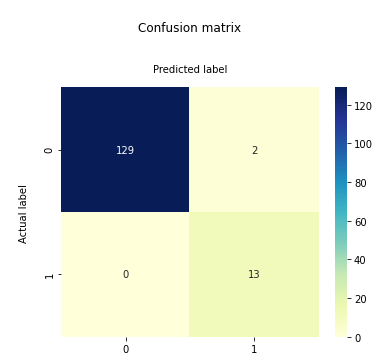

In [142]:
from sklearn.model_selection import train_test_split

logistic_model = LogisticRegression(class_weight='balanced')

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features_df, df['isFireType'], train_size=0.2)

logistic_model.fit(X_train, Y_train)

pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train, Y_train)
test_accuracy = metrics.accuracy_score(pred_test, Y_test)

print(f'\nTrain Accuracy = {train_accuracy * 100:.4f}')
print(f'\nTest Accuracy = {test_accuracy * 100:.4f}')
print(f'Test Precision Score = {metrics.precision_score(Y_test, pred_test) * 100:.4f}')
print(f'Test Recall Score = {metrics.recall_score(Y_test, pred_test) * 100:.4f}\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

class_names=["0","1"] # name of classes
fig, ax = plt.subplots(figsize=(5, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n')
plt.ylabel('\nActual label\n')
plt.xlabel('\nPredicted label\n')

In [143]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'alpha':[0.0001, 1.5000, 0.0001]}
# classifier = GridSearchCV(logistic_model, parameters, cv=20)
# clf.fit(X_train, Y_train)

# print('Mean train set score: {}'.format(clf.cv_results_['mean_train_score']))

## 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )
---

In [144]:
print(df.groupby(['isFireType'])['isFireType'].count())

isFireType
False    665
True      56
Name: isFireType, dtype: int64


In [145]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m", ]]

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features_df, 
                   df["isFireType"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)

# sm = SMOTE(random_state=2)
# X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_legendary = X[X.isFireType==False]
legendary = X[X.isFireType==True]

# upsample minority
legendary_upsampled = resample(legendary,
                          replace=True, # sample with replacement
                          n_samples=len(not_legendary), # match number in majority class
                          random_state=0) # reproducible results

# combine majority and upsampled minority
legendary_upsampled = pd.concat([not_legendary, legendary_upsampled])

# check new class counts
legendary_upsampled.isFireType.value_counts()

False    197
True     197
Name: isFireType, dtype: int64

In [146]:
sorted(logistic_model.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [147]:
logistic_model.C

1.0

In [148]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': np.linspace(1, 10, 20)
             }

clf = GridSearchCV(logistic_model, parameters, cv=5, verbose=10, n_jobs=5)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=5,
             param_grid={'C': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             verbose=10)

In [149]:
# acquire best parameter
best_param = clf.best_params_['C']
best_param

# fit Logistic Regression model
lr1 = LogisticRegression(C=best_param, verbose=5).fit(X_train, Y_train)
lr1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=5)


Accuracy: 97.6238
Precision: 85.7143
Recall: 81.0811



Text(0.5, 257.44, '\nPredicted label\n')

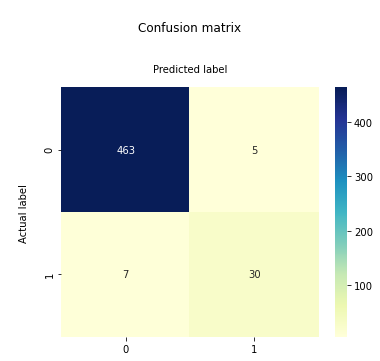

In [150]:
# legendary_upsampled = LogisticRegression(class_weight='balanced', solver="liblinear").fit(X_train_res, Y_train_res)
upsampled_pred = lr1.predict(X_test)

Y_train = legendary_upsampled.isFireType
X_train = legendary_upsampled.drop('isFireType', axis=1)

print(f'\nAccuracy: {metrics.accuracy_score(Y_test, upsampled_pred) * 100:.4f}')
print(f'Precision: {metrics.precision_score(Y_test, upsampled_pred) * 100:.4f}')
print(f'Recall: {metrics.recall_score(Y_test, upsampled_pred) * 100:.4f}\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name of classes
fig, ax = plt.subplots(figsize=(5, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n')
plt.ylabel('\nActual label\n')
plt.xlabel('\nPredicted label\n')